In [ ]:
import pandas as pd
import numpy as np

from numpy.random import uniform

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

import random

# Data Initialization and Summary

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/mrandika/CII3C3_ML_Unsupervised-Learning/main/country-dataset.csv")

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Get dataset sample
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
# Check if dataset contain any null
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
# Check if data is unique
len(df['country'].unique()) == len(df)

True

In [ ]:
# Describe the dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Data Exploration

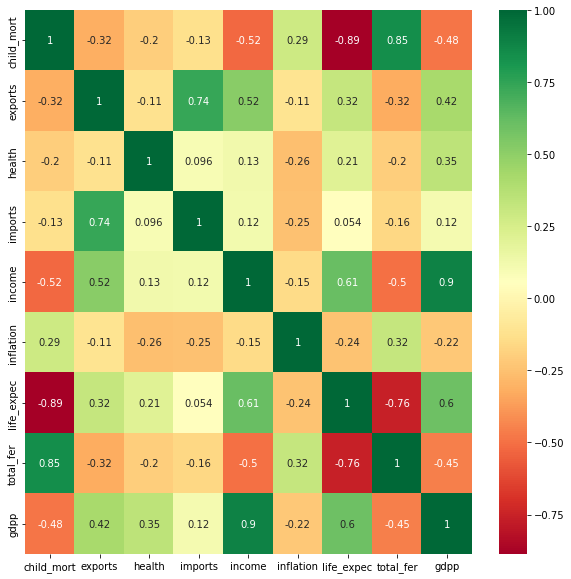

In [ ]:
# Compute correlation matrix using pearson method
corrmat = df.corr()
plt.figure(figsize=(10,10))
g = sns.heatmap(df[corrmat.index].corr(), annot=True, cmap="RdYlGn")

Text(0.5, 1.0, 'Country with lowest child mortality')

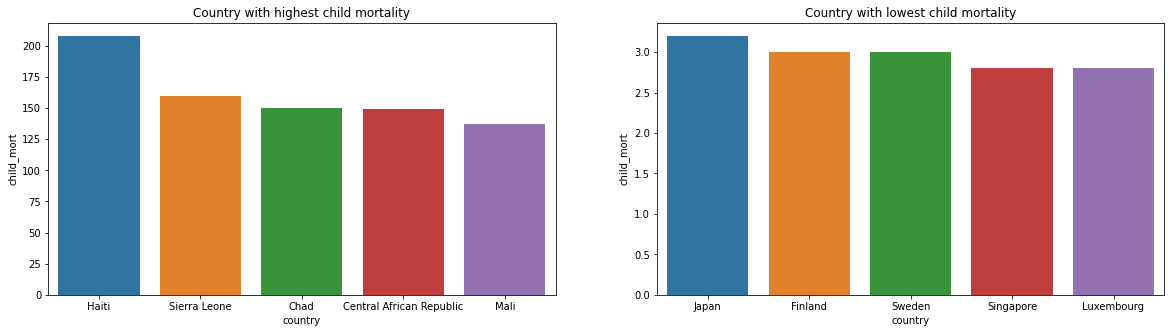

In [ ]:
# Set data
data = df.sort_values(ascending=False, by='child_mort')

# Setup plot
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
  
plt.subplot(1, 2, 1)
ax = sns.barplot(x='country', y='child_mort', data=data.iloc[:5])
plt.title(f'Country with highest child mortality')

plt.subplot(1, 2, 2)
ax = sns.barplot(x='country', y='child_mort', data=data.iloc[161:166])
plt.title(f'Country with lowest child mortality')

**Conclusion: Child Mortality**

*Death of children under 5 years of age per 1000 live births*

Child mortality is an important measure of a country's overall health and development because it provides an indication of the health and well-being of children within the country.

Text(0.5, 1.0, 'Country with lowest health spending')

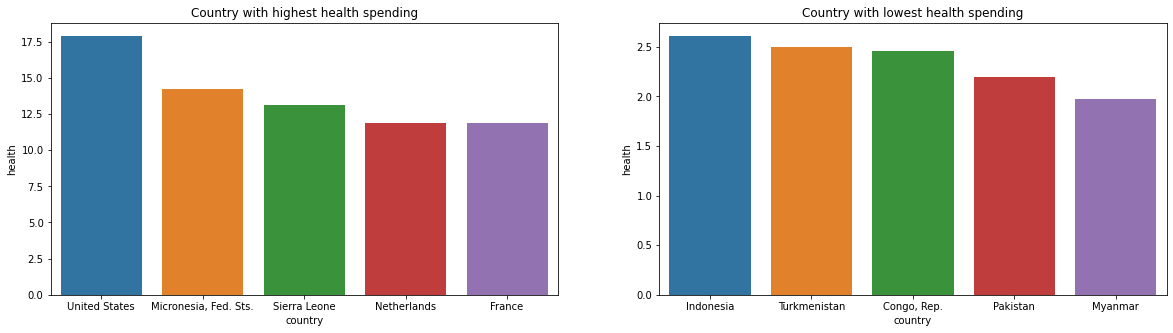

In [ ]:
# Set data
data = df.sort_values(ascending=False, by='health')

# Setup plot
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
  
plt.subplot(1, 2, 1)
ax = sns.barplot(x='country', y='health', data=data.iloc[:5])
plt.title(f'Country with highest health spending')

plt.subplot(1, 2, 2)
ax = sns.barplot(x='country', y='health', data=data.iloc[161:166])
plt.title(f'Country with lowest health spending')

**Conclusion: Health Spending**

*Total health spending per capita. Given as %age of GDP per capita*

Health spending is important for a country because it is a crucial investment in the health and well-being of the country's population. When a country spends money on healthcare, it is able to provide its citizens with access to necessary medical services and treatments, which can help to prevent and treat diseases and health conditions. This can help to improve the overall health of the population, which can in turn lead to increased productivity and economic growth.

Text(0.5, 1.0, 'Country with lowest life expectation')

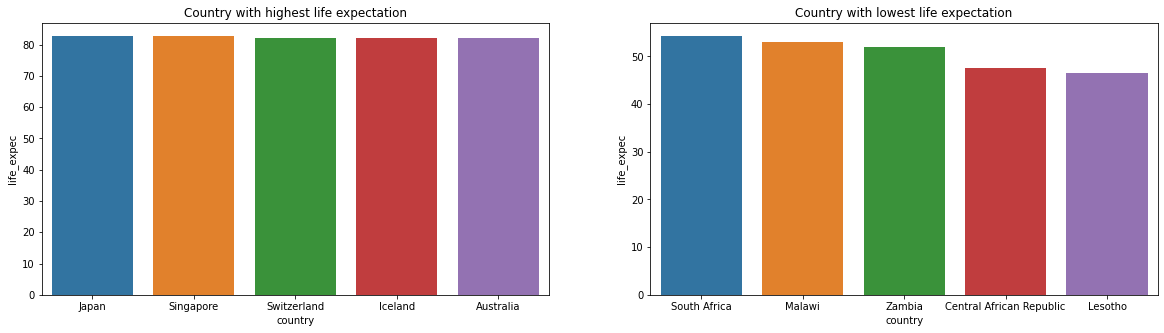

In [ ]:
# Set data
data = df.sort_values(ascending=False, by='life_expec')

# Setup plot
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
  
plt.subplot(1, 2, 1)
ax = sns.barplot(x='country', y='life_expec', data=data.iloc[:5])
plt.title(f'Country with highest life expectation')

plt.subplot(1, 2, 2)
ax = sns.barplot(x='country', y='life_expec', data=data.iloc[161:166])
plt.title(f'Country with lowest life expectation')

**Conclusion: Life expectation**

*The average number of years a new born child would live if the current mortality patterns are to remain the same*

Life expectancy is an important measure of a country's overall health and development because it provides an indication of the overall well-being and quality of life for the people living in the country.

Text(0.5, 1.0, 'Country with lowest total fertility')

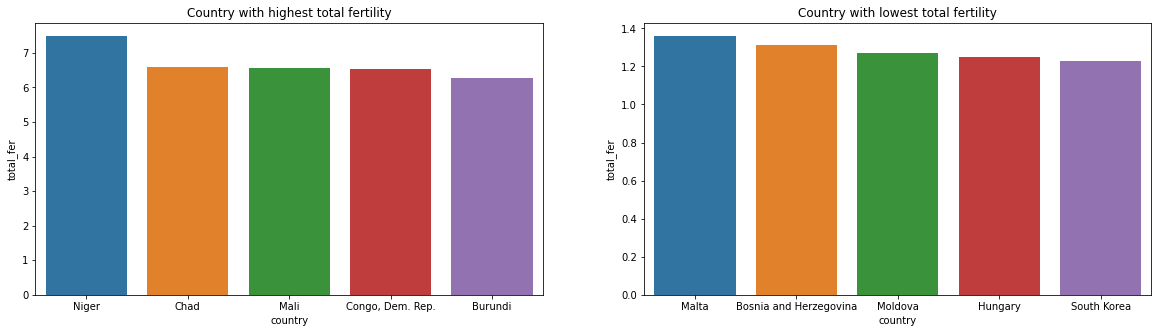

In [ ]:
# Set data
data = df.sort_values(ascending=False, by='total_fer')

# Setup plot
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
  
plt.subplot(1, 2, 1)
ax = sns.barplot(x='country', y='total_fer', data=data.iloc[:5])
plt.title(f'Country with highest total fertility')

plt.subplot(1, 2, 2)
ax = sns.barplot(x='country', y='total_fer', data=data.iloc[161:166])
plt.title(f'Country with lowest total fertility')

**Conclusion: Total Fertility**

*The number of children that would be born to each woman if the current age-fertility rates remain the same.*

Total fertility is an important measure of a country's population growth and development because it provides an indication of the average number of children that are being born to women within the country. A high total fertility rate is generally considered to be an indication of a growing population, while a low total fertility rate can be an indication of a declining population.

Text(0.5, 1.0, 'Country with lowest exports')

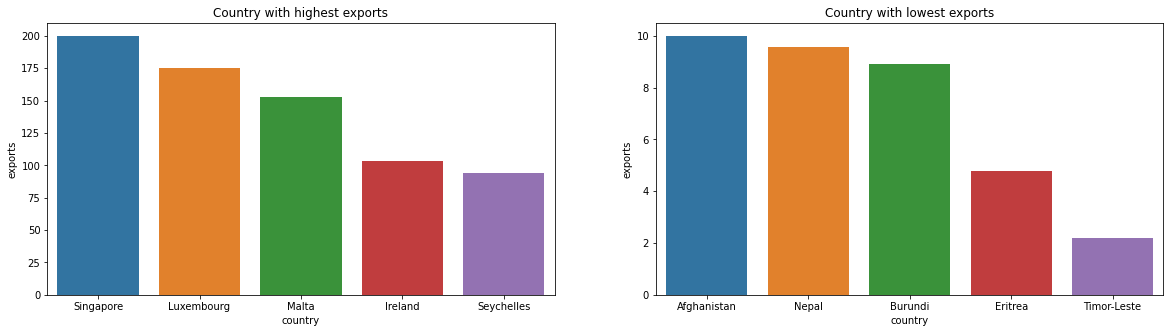

In [ ]:
# Set data
data = df.sort_values(ascending=False, by='exports')

# Setup plot
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
  
plt.subplot(1, 2, 1)
ax = sns.barplot(x='country', y='exports', data=data.iloc[:5])
plt.title(f'Country with highest exports')

plt.subplot(1, 2, 2)
ax = sns.barplot(x='country', y='exports', data=data.iloc[161:166])
plt.title(f'Country with lowest exports')

**Conclusion: Exports**

*Exports of goods and services per capita. Given as %age of the GDP per capita*

Exports are important for a country because they can help to boost the country's economy by providing a source of income and foreign currency. When a country exports goods and services, it is able to sell these goods and services to other countries in exchange for money. This money can then be used to support the country's domestic economy by providing a source of income and capital that can be invested in various industries.

Text(0.5, 1.0, 'Country with lowest imports')

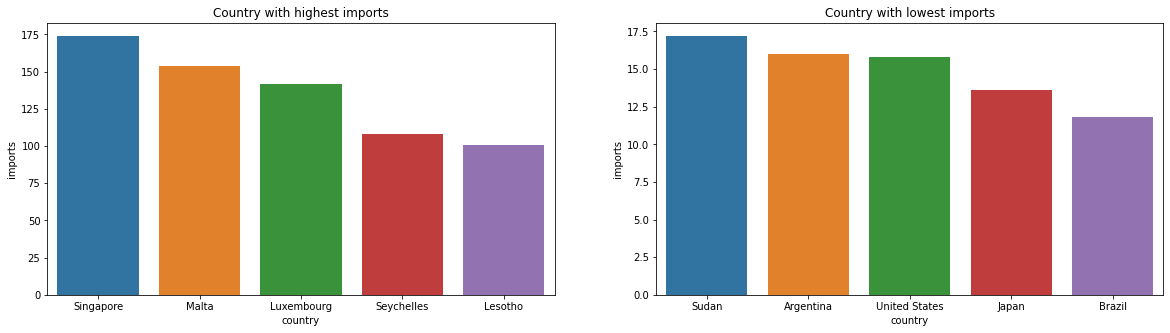

In [ ]:
# Set data
data = df.sort_values(ascending=False, by='imports')

# Setup plot
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
  
plt.subplot(1, 2, 1)
ax = sns.barplot(x='country', y='imports', data=data.iloc[:5])
plt.title(f'Country with highest imports')

plt.subplot(1, 2, 2)
ax = sns.barplot(x='country', y='imports', data=data.iloc[161:166])
plt.title(f'Country with lowest imports')

**Conclusion: Imports**

*Imports of goods and services per capita. Given as %age of the GDP per capita*

Imports are important for a country because they can help to increase the variety and availability of goods and services within the domestic market. By importing goods and services from other countries, a country is able to offer its consumers a wider range of products to choose from, which can help to improve their standard of living.

Text(0.5, 1.0, 'Country with lowest income')

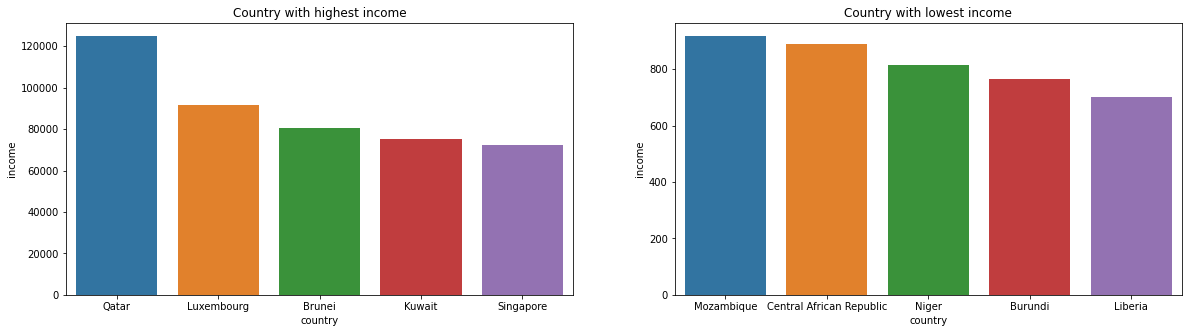

In [ ]:
# Set data
data = df.sort_values(ascending=False, by='income')

# Setup plot
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
  
plt.subplot(1, 2, 1)
ax = sns.barplot(x='country', y='income', data=data.iloc[:5])
plt.title(f'Country with highest income')

plt.subplot(1, 2, 2)
ax = sns.barplot(x='country', y='income', data=data.iloc[161:166])
plt.title(f'Country with lowest income')

**Conclusion: Income**

*Net income per person*

Net income per person is an important measure of a country's economic health because it provides an indication of the average standard of living within the country. Net income per person is calculated by dividing the total amount of income earned by a country's population by the total population of the country. A higher net income per person indicates that the average person in the country is earning more money, which can be an indication of a strong economy and a high standard of living.

Text(0.5, 1.0, 'Country with lowest inflation')

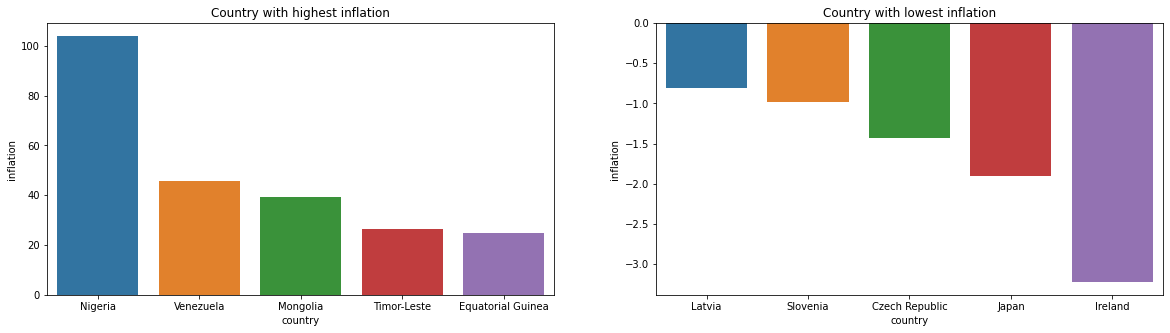

In [ ]:
# Set data
data = df.sort_values(ascending=False, by='inflation')

# Setup plot
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
  
plt.subplot(1, 2, 1)
ax = sns.barplot(x='country', y='inflation', data=data.iloc[:5])
plt.title(f'Country with highest inflation')

plt.subplot(1, 2, 2)
ax = sns.barplot(x='country', y='inflation', data=data.iloc[161:166])
plt.title(f'Country with lowest inflation')

**Conclusion: Inflation**

*The measurement of the annual growth rate of the Total GDP*

Inflation is important for a country because it can have a significant impact on the economy and the standard of living for the people living in the country. Inflation is a measure of the rate at which the general level of prices for goods and services is rising, and it is typically measured as an annual percentage increase. A high rate of inflation can be a problem for a country because it can erode the purchasing power of money, which means that people will need to spend more money to buy the same goods and services. This can lead to an overall decrease in the standard of living for people living in the country.

Text(0.5, 1.0, 'Country with lowest gdpp')

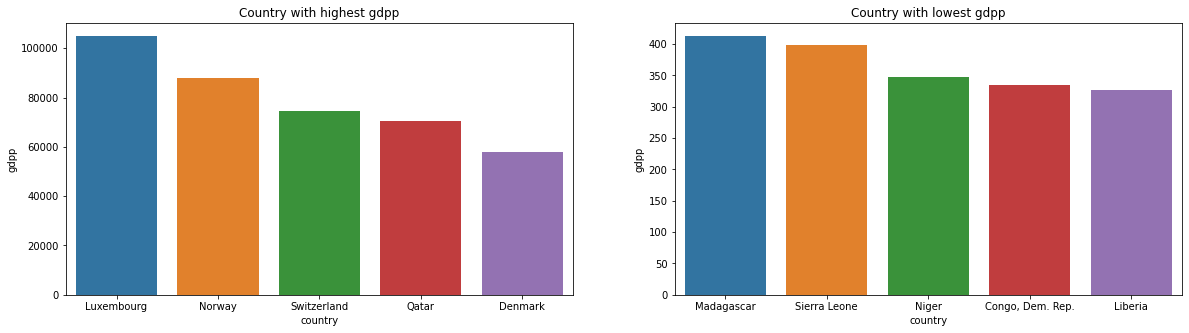

In [ ]:
# Set data
data = df.sort_values(ascending=False, by='gdpp')

# Setup plot
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5)) 
  
plt.subplot(1, 2, 1)
ax = sns.barplot(x='country', y='gdpp', data=data.iloc[:5])
plt.title(f'Country with highest gdpp')

plt.subplot(1, 2, 2)
ax = sns.barplot(x='country', y='gdpp', data=data.iloc[161:166])
plt.title(f'Country with lowest gdpp')

**Conclusion: GDPP**

*The GDP per capita. Calculated as the Total GDP divided by the total population.*

GDP is an important measure of a country's economic health because it provides a comprehensive view of the value of all goods and services produced within the country over a given period of time.

# Data Feature Combination
Combine related columns to one generic column
- Health (child_mort, health, life_expect, total_fer)
- Trade (exports, imports)
- Economy (income, inflation, gdpp)

In [ ]:
# Select the related columns
health = ['child_mort', 'health', 'life_expec', 'total_fer']
trade = ['exports', 'imports']
economy = ['income', 'inflation', 'gdpp']

In [ ]:
data = pd.DataFrame()
countries = df['country'].to_numpy()

health_data = 0
trade_data = 0
economy_data = 0

for column in health:
  s = df[column] / df[column].mean()
  health_data += s

for column in trade:
  s = df[column] / df[column].mean()
  trade_data += s

for column in economy:
  s = df[column] / df[column].mean()
  economy_data += s

data['health'] = health_data
data['trade'] = trade_data
data['economy'] = economy_data

data.head()

,health,trade,economy
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


# Data Normalization
The purpose of normalizing the data is to ensure that all of the features are on the same scale, which can improve the performance of machine learning algorithms that are applied to the data.

In [ ]:
# Setup the Scaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(data), columns=['health', 'trade', 'economy'])

# Set the train data
x_train = df.to_numpy()

In [ ]:
# Insert the country data
df.insert(loc=0, column='country', value=countries)

df.head()

,country,health,trade,economy
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043


# Data Visualization

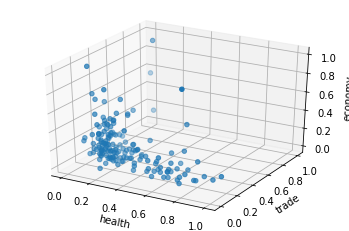

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['health']
y = df['trade']
z = df['economy']

ax.set_xlabel("health")
ax.set_ylabel("trade")
ax.set_zlabel("economy")

ax.scatter(x, y, z)

plt.show()

# K-Means Implementation


In [ ]:
def euclidean_distance(point, data):
  return np.sqrt(np.sum((point - data)**2, axis=1))

class kMeans:
  def __init__(self, n_clusters=8, max_iter=300):
    self.n_clusters = n_clusters
    self.max_iter = max_iter

  def fit(self, train):
    self.centroids = [random.choice(train)]
    for _ in range(self.n_clusters-1):
      dists = np.sum([euclidean_distance(centroid, train) for centroid in self.centroids], axis=0)
      dists /= np.sum(dists)
      new_centroid_idx, = np.random.choice(range(len(train)), size=1, p=dists)
      self.centroids += [train[new_centroid_idx]]

    iteration = 0
    previous_centroids = None

    while np.not_equal(self.centroids, previous_centroids).any() and iteration < self.max_iter:
      points = [[] for _ in range(self.n_clusters)]
      for x in train:
        distance = euclidean_distance(x, self.centroids)
        ctrd_id = np.argmin(distance)
        points[ctrd_id].append(x)
      
      previous_centroids = self.centroids
      self.centroids = [np.mean(cluster, axis=0) for cluster in points]

      for i, centroid in enumerate(self.centroids):
        if np.isnan(centroid).any():
          self.centroids[i] = previous_centroids[i]
      
      iteration += 1
    
  def inertia(self, train, centers):
    distances = euclidean_distance(train[:, np.newaxis, :], centers)
    squared_distances = distances**2
    total_distance = np.sum(squared_distances, axis=1)

    return np.sum(total_distance)


  def evaluate(self, point):
    centroids = []
    centroid_idxs = []

    for x in point:
        dists = euclidean_distance(x, self.centroids)
        centroid_idx = np.argmin(dists)
        centroids.append(self.centroids[centroid_idx])
        centroid_idxs.append(centroid_idx)

    return centroids, centroid_idxs

In [ ]:
inertia = []

for i in range(2, 12):
  kmeans_test = kMeans(n_clusters=i)
  kmeans_test.fit(x_train)
  centers, _ = kmeans_test.evaluate(x_train)
  inertia.append(kmeans_test.inertia(x_train, centers))

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


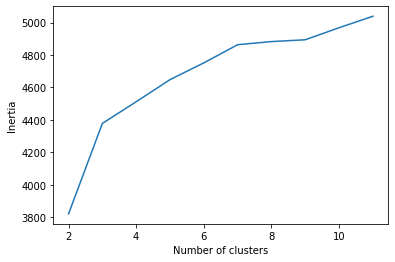

In [ ]:
plt.plot(range(2, 12), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Inertia increases on each cluster because the inertia calculation is based on the distance between the data points and the centroid of their cluster. As the number of clusters increases, the distance between the data points and the centroid of their cluster will also increase, resulting in a higher inertia value. This is because each data point will be assigned to its own cluster, which will result in a higher distance between the data point and its cluster centroid.

In [ ]:
# Model Setup
kmeans = kMeans(n_clusters=2, max_iter=500)

In [ ]:
# Fit the model
kmeans.fit(x_train)

In [ ]:
# Get the cluster centers and cluster indexes for each sample
centers, cluster_idxs = kmeans.evaluate(x_train)

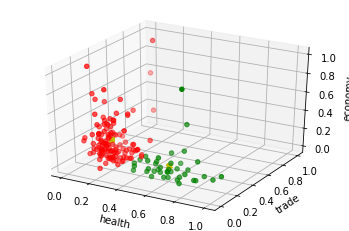

In [ ]:
# Create a scatter plot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# Set the labels for the axes
ax.set_xlabel("health")
ax.set_ylabel("trade")
ax.set_zlabel("economy")

# Set the colors for each sample based on its cluster index
colors = ['r', 'g']
colors = [colors[i] for i in cluster_idxs]

# Plot the data points
ax.scatter(df['health'], df['trade'], df['economy'], c=colors)

# Plot the cluster centers
centers = np.array(centers)
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker="X", color = 'y')

# Show the plot
plt.show()

In [ ]:
def calculate_score(health, trade, economy):
    # Calculate the score using the normalized values
    score = 0.5 * health + 0.3 * trade + 0.2 * economy
    
    # Return the calculated score
    return score

In [ ]:
# Compute urgency score
scores = []

for point in data.to_numpy():
  score = calculate_score(point[0], point[1], point[2])

  # Append the score to the scores list
  scores.append(score)

df['score'] = scores

# Add cluster to dataframe
df['cluster'] = cluster_idxs

# Add country to dataframe
df['country'] = countries

df.head()

,country,health,trade,economy,score,cluster
0,Afghanistan,0.625740,0.139614,0.079820,3.750098,1
1,Albania,0.127451,0.199901,0.088756,2.327556,0
2,Algeria,0.182485,0.186622,0.212808,2.809080,0
3,Angola,0.661381,0.283058,0.236946,4.662610,1
4,Antigua and Barbuda,0.116409,0.275189,0.145043,2.639361,0


In [ ]:
cluster_0 = df.loc[df['cluster'] == 0].sort_values(ascending=False, by='score')
cluster_1 = df.loc[df['cluster'] == 1].sort_values(ascending=False, by='score')

clusters = [cluster_0, cluster_1]

In [ ]:
for i in range(len(clusters)):
  print(f"Cluster {i}")

  for data in clusters[i].to_numpy():
    print(f"{data[0]} {data[4]}")
  
  print()

Cluster 0
Luxembourg 6.427398870270694
Singapore 5.239773872189688
Qatar 4.493856140430781
Malta 4.379032752499517
Switzerland 4.357262296193335
Norway 4.348252320474369
Ireland 4.153249515905557
Netherlands 4.068163970452207
Belgium 3.9743457544123326
Denmark 3.9087175777896537
Congo, Rep. 3.8887363996814135
United States 3.839461084084413
Brunei 3.789003927168829
United Arab Emirates 3.7472275645448088
Kuwait 3.7033336181173633
Austria 3.6079571464457025
Sweden 3.586255270373999
Iceland 3.5841205773206015
Gabon 3.5100204934357997
Yemen 3.5040156555417665
Mongolia 3.498837408385222
Iraq 3.498599134803092
Canada 3.445225834064643
Venezuela 3.4378774828391103
Saudi Arabia 3.3965869857290354
Germany 3.3909175476488205
Oman 3.357397053013057
Botswana 3.3166783010301466
France 3.3081554806142908
Finland 3.2876062301592004
Namibia 3.2623244208618196
Solomon Islands 3.2457160671521263
Panama 3.229329773182213
Bahrain 3.2047437867403588
Australia 3.2032334303604553
Jordan 3.2012562494798327
N